In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importing data to fetch and download the dataset

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)


In [4]:
dt = data.frame # storing dataset inside a variable

In [5]:
#returns rows and column
rows, columns = dt.shape 

print(f"Rows:{rows}", f"Columns:{columns}")


Rows:20640 Columns:9


In [6]:
#returns first 5 rows 
dt.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
#for understanding my data structure
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


As we know from above data, our target variable is MedHouseVal, which represents median house value in California dsitricts. we are trying top predtict house prices base on different feature such as income, location and population.
This is supervised learning because we have labeled data (house prcies).
It is a regressipon problem because the target variable is continuous.

PART A - EDA

In [8]:
dt.describe()

# helps us undertand are values realistic, any extreme values and average house prcies


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Summary Statistics

The average median house value is approximately 2.07, meaning the average house price is around $207,000 something.

The minimum value is 0.15, while the maximum value is 5.0, indicating a wide variation in housing prices.

Features such as Population and AveRooms show high maximum values compared to their averages, which may indicate the presence of outliers.


In [9]:
# checking for missing values

missing_values = dt.isnull().sum()
print(f'Missing Values: {missing_values}')

Missing Values: MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64



There are no missing values in the dataset. Therefore, no data cleaning or imputation is required at this stage.


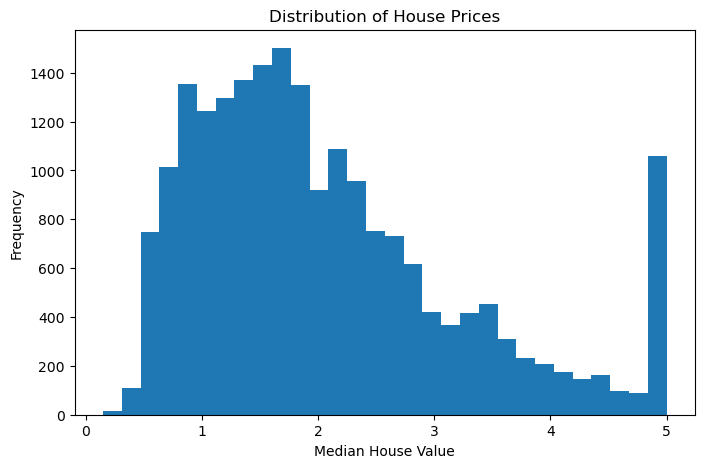

In [10]:
plt.figure(figsize=(8,5))
plt.hist(dt['MedHouseVal'], bins=30)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()


# Distribution of Target Variable

The distribution of house prices appears to be slightly right-skewed. 

Most districts have moderate house prices, while fewer districts have very high prices. This creates a longer tail on the right side of the histogram.


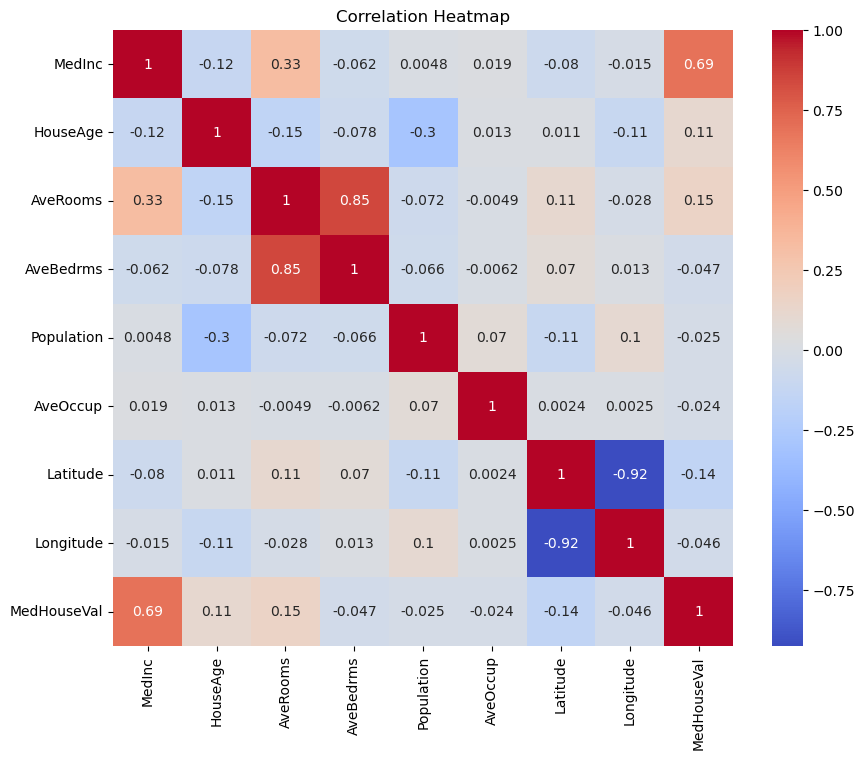

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Correlation Analysis

The feature most strongly correlated with house price is "MedInc" (Median Income) with a correlation of approximately 0.68.

This indicates that higher income areas tend to have higher house prices.

Latitude and Longitude show negative correlations, suggesting that geographical location also influences housing prices.


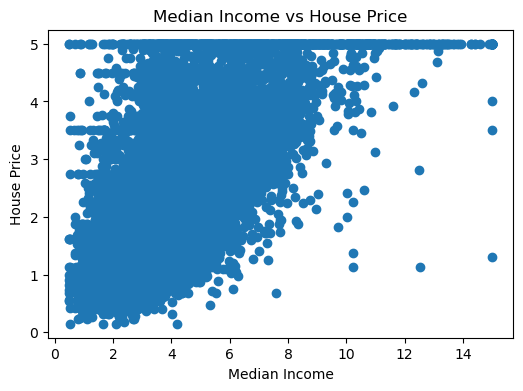

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(dt['MedInc'], dt['MedHouseVal'])
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Median Income vs House Price")
plt.show()


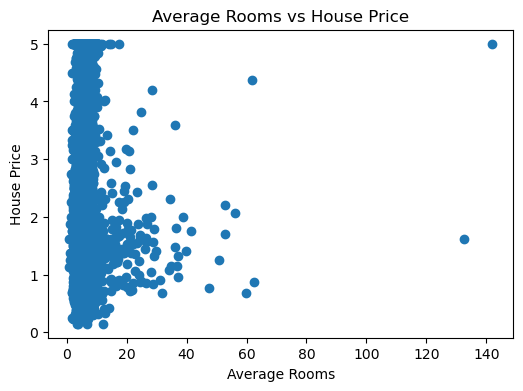

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(dt['AveRooms'], dt['MedHouseVal'])
plt.xlabel("Average Rooms")
plt.ylabel("House Price")
plt.title("Average Rooms vs House Price")
plt.show()


# Scatter Plot Analysis

The scatter plot between Median Income and House Price shows a clear positive linear relationship. As income increases, house prices also increase.

The relationship between Average Rooms and House Price is positive but weaker compared to income.

This suggests that Median Income is the strongest predictor of house prices in this dataset.


# Data Preparation

Before training the regression models, we need to prepare the data properly. 
This includes separating features and target variable, splitting the dataset 
into training and testing sets, and scaling the features.


In [14]:
x= dt.drop("MedHouseVal", axis=1) # remove the median house value from dataset and everything else becomes x
y = dt["MedHouseVal"] # adding target column to y variable



In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

#test_size=0.2 (20% data for testing, 80% for training)

#random_state=42 (ensures reproducibility (same split every time))

In [16]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (16512, 8)
x_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


# Why Do We Split the Data?

We split the dataset into training and testing sets to evaluate the model on unseen data.

If we evaluate the model only on training data, it may memorize patterns instead of learning general relationships. This is called overfitting.

Testing on unseen data helps measure how well the model generalizes to new data.


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
# StandardScaler() Standardizes features, Converts them to mean = 0 and std = 1

# Fit on training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform test data
x_test_scaled = scaler.transform(x_test)


# Why Do We Scale Features?

Features in the dataset have different ranges. For example, Population can be in thousands, while Latitude is between 32 and 42.

Scaling ensures all features are on the same scale, preventing features with large values from dominating the model.

Scaling is especially important for Ridge and Lasso regression because they apply regularization penalties based on coefficient magnitude.


# Simple Linear Regression

In this section, we train a simple linear regression model using only one feature - the feature most strongly correlated with house price.


In [18]:
# Selecting only the most correlated feature
x_train_single = x_train[['MedInc']]
x_test_single = x_test[['MedInc']]


In [19]:
from sklearn.linear_model import LinearRegression

# Create model
simple_model = LinearRegression()

# Train model
simple_model.fit(x_train_single, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
print("Coefficient (Slope):", simple_model.coef_[0])
print("Intercept:", simple_model.intercept_)


Coefficient (Slope): 0.41933849393812694
Intercept: 0.4445972916907883


# Interpretation of Coefficient

The coefficient of MedInc is approximately 0.42.

This means that for every 1 unit increase in median income, the predicted house price increases by approximately 0.42 units.

This confirms that income has a positive impact on housing prices.


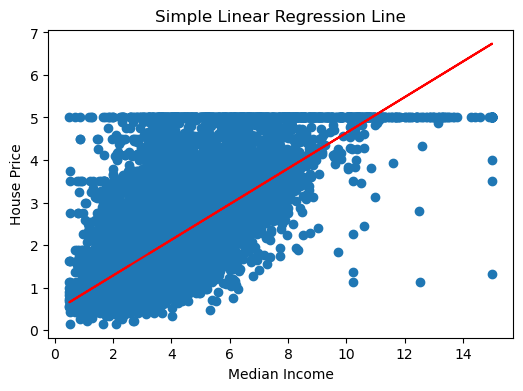

In [21]:
# Predictions
y_pred_train_single = simple_model.predict(x_train_single)

plt.figure(figsize=(6,4))
plt.scatter(x_train_single, y_train)
plt.plot(x_train_single, y_pred_train_single, color='red')
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Simple Linear Regression Line")
plt.show()


In [22]:
from sklearn.metrics import r2_score, mean_squared_error

# Train predictions
y_train_pred = simple_model.predict(x_train_single)
y_test_pred = simple_model.predict(x_test_single)

# R2 Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train R2:", r2_train)
print("Test R2:", r2_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)


Train R2: 0.4769927345820524
Test R2: 0.45885918903846656
Train RMSE: 0.8361487409655547
Test RMSE: 0.8420901241414454


# Model Evaluation

The Simple Linear Regression model achieved an R² score of 0.477 on the training set and 0.459 on the test set.

This indicates that the model explains approximately 46% of the variation in house prices using only median income as a predictor.

The small difference between train and test R² (0.018) suggests that the model does not suffer from significant overfitting and generalizes reasonably well to unseen data.

The RMSE on the test set is approximately 0.842, meaning the average prediction error is about 0.84 units (in hundreds of thousands of dollars). This corresponds to an average error of around $84,000, which indicates that using only one feature is insufficient for highly accurate predictions.


# Multiple Linear Regression

In this section, we train a multiple linear regression model using all available features to predict house prices.

Using multiple predictors allows the model to capture more complex relationships compared to simple linear regression.


In [23]:
from sklearn.linear_model import LinearRegression

# Create model
multi_model = LinearRegression()

# Train model on scaled data
multi_model.fit(x_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# Predictions
y_train_pred_multi = multi_model.predict(x_train_scaled)
y_test_pred_multi = multi_model.predict(x_test_scaled)


In [25]:
from sklearn.metrics import r2_score, mean_squared_error


# R2 Scores
r2_train_multi = r2_score(y_train, y_train_pred_multi)
r2_test_multi = r2_score(y_test, y_test_pred_multi)

# RMSE
rmse_train_multi = np.sqrt(mean_squared_error(y_train, y_train_pred_multi))
rmse_test_multi = np.sqrt(mean_squared_error(y_test, y_test_pred_multi))

print("Train R2:", r2_train_multi)
print("Test R2:", r2_test_multi)
print("Train RMSE:", rmse_train_multi)
print("Test RMSE:", rmse_test_multi)


Train R2: 0.6125511913966952
Test R2: 0.575787706032451
Train RMSE: 0.7196757085831575
Test RMSE: 0.7455813830127762


# Comparison with Simple Linear Regression

The multiple linear regression model achieved a training R² of 0.613 and a test R² of 0.576.

Compared to the simple linear regression model (test R² = 0.459), the multiple regression model improved performance by approximately 11.7%.

The test RMSE decreased from 0.842 to 0.746, reducing the average prediction error by approximately $9,600.

This confirms that house prices depend on multiple factors, and including all features significantly improves model accuracy.

The gap between train and test R² is 0.037, indicating that the model does not suffer from significant overfitting and generalizes well to unseen data.


# Ridge Regression

Ridge regression adds L2 regularization to linear regression. 
It penalizes large coefficients, helping to reduce overfitting and improve model generalization.


In [26]:
from sklearn.linear_model import Ridge

# Create Ridge model
ridge_model = Ridge(alpha=1.0)

# Train on scaled data
ridge_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred_ridge = ridge_model.predict(x_train_scaled)
y_test_pred_ridge = ridge_model.predict(x_test_scaled)


In [27]:
# R2 Scores
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# RMSE
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("Ridge Train R2:", r2_train_ridge)
print("Ridge Test R2:", r2_test_ridge)
print("Ridge Train RMSE:", rmse_train_ridge)
print("Ridge Test RMSE:", rmse_test_ridge)


Ridge Train R2: 0.612551121863456
Ridge Test R2: 0.5758157428913682
Ridge Train RMSE: 0.7196757731612126
Ridge Test RMSE: 0.745556744281478


# Ridge Regression Results

The Ridge regression model achieved a training R² of 0.613 and a test R² of 0.576.

The performance is almost identical to the multiple linear regression model. 
This suggests that the original model was not heavily overfitting.

Since the gap between training and test R² is small (0.037), the model generalizes well.

With alpha = 1.0, Ridge regularization has minimal impact on performance.


# Lasso Regression

Lasso regression applies L1 regularization, which can shrink some coefficients to exactly zero. 
This makes Lasso useful for feature selection.


In [28]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)

lasso_model.fit(x_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(x_train_scaled)
y_test_pred_lasso = lasso_model.predict(x_test_scaled)

# R2
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# RMSE
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print("Lasso Train R2:", r2_train_lasso)
print("Lasso Test R2:", r2_test_lasso)
print("Lasso Test RMSE:", rmse_test_lasso)


Lasso Train R2: 0.4974185516409556
Lasso Test R2: 0.48136113250290735
Lasso Test RMSE: 0.8243961598848472


# Lasso Regression Results

The Lasso regression model achieved a test R² of 0.481, which is lower than multiple linear regression and Ridge regression.

This indicates that with alpha = 0.1, Lasso regularization was too strong and reduced model performance.

The model appears to underfit the data, as both train and test R² are lower compared to the unregularized model.


In [29]:
lasso_coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': lasso_model.coef_
})

lasso_coefficients


,Feature,Coefficient
0,MedInc,0.710598
1,HouseAge,0.106453
2,AveRooms,-0.000000
3,AveBedrms,0.000000
4,Population,-0.000000
5,AveOccup,-0.000000
6,Latitude,-0.011469
7,Longitude,-0.000000


# Lasso Feature Selection

Lasso regression set the coefficients of the following features to exactly zero:

- AveRooms
- AveBedrms
- Population
- AveOccup
- Longitude

This means Lasso removed these features from the model.

While this simplifies the model and performs automatic feature selection, the overall model performance decreased compared to multiple linear regression.

This suggests that some of the removed features still contained useful predictive information.


# Alpha Values


In [30]:
alpha_values = [0.01, 0.1, 1, 10, 100]


In [31]:
from sklearn.linear_model import Ridge

ridge_results = []

alpha_values = [0.01, 0.1, 1, 10, 100]

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_scaled, y_train)
    
    y_test_pred = ridge.predict(x_test_scaled)
    r2 = r2_score(y_test, y_test_pred)
    
    ridge_results.append((alpha, r2))

ridge_df = pd.DataFrame(ridge_results, columns=['Alpha', 'Test R2'])
ridge_df


,Alpha,Test R2
0,0.01,0.575788
1,0.10,0.575791
2,1.00,0.575816
3,10.00,0.576060
4,100.00,0.577791


In [32]:
from sklearn.linear_model import Lasso

lasso_results = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(x_train_scaled, y_train)
    
    y_test_pred = lasso.predict(x_test_scaled)
    r2 = r2_score(y_test, y_test_pred)
    
    lasso_results.append((alpha, r2))

lasso_df = pd.DataFrame(lasso_results, columns=['Alpha', 'Test R2'])
lasso_df


,Alpha,Test R2
0,0.01,0.581615
1,0.10,0.481361
2,1.00,-0.000219
3,10.00,-0.000219
4,100.00,-0.000219


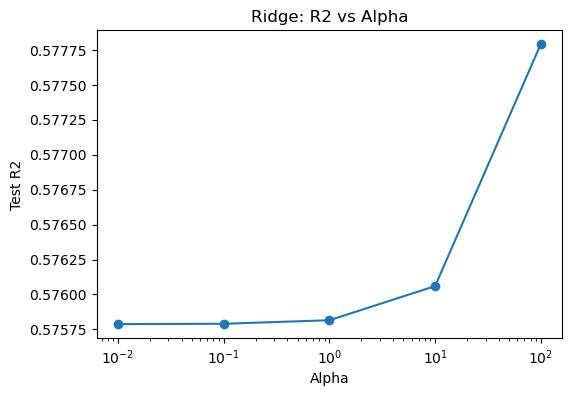

In [33]:
plt.figure(figsize=(6,4))
plt.plot(ridge_df['Alpha'], ridge_df['Test R2'], marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Test R2")
plt.title("Ridge: R2 vs Alpha")
plt.show()


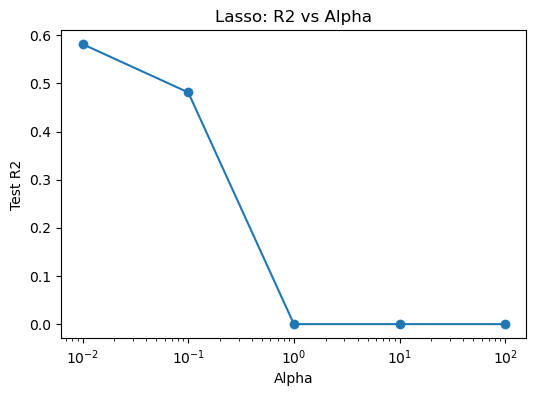

In [34]:
plt.figure(figsize=(6,4))
plt.plot(lasso_df['Alpha'], lasso_df['Test R2'], marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Test R2")
plt.title("Lasso: R2 vs Alpha")
plt.show()


# Effect of Alpha on Model Performance

For Ridge regression, performance remains stable across different alpha values and slightly improves at alpha = 100. The best Ridge model achieved a test R² of approximately 0.578.

For Lasso regression, performance is highest at alpha = 0.01 (test R² ≈ 0.582). However, as alpha increases, performance drops significantly. For alpha ≥ 1, the model completely underfits, and R² becomes approximately zero.

This occurs because large alpha values shrink the coefficients too aggressively, forcing them toward zero and removing important predictive information.

Therefore:
- The best alpha for Ridge is 100.
- The best alpha for Lasso is 0.01.

When alpha is too large, the model becomes overly simplified and loses predictive power.


In [35]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train_scaled, y_train)

y_train_pred_ridge_100 = ridge_100.predict(x_train_scaled)
y_test_pred_ridge_100 = ridge_100.predict(x_test_scaled)

r2_train_ridge_100 = r2_score(y_train, y_train_pred_ridge_100)
r2_test_ridge_100 = r2_score(y_test, y_test_pred_ridge_100)

rmse_test_ridge_100 = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge_100))

r2_train_ridge_100, r2_test_ridge_100, rmse_test_ridge_100

lasso_001 = Lasso(alpha=0.01, max_iter=10000)
lasso_001.fit(x_train_scaled, y_train)

y_train_pred_lasso_001 = lasso_001.predict(x_train_scaled)
y_test_pred_lasso_001 = lasso_001.predict(x_test_scaled)

r2_train_lasso_001 = r2_score(y_train, y_train_pred_lasso_001)
r2_test_lasso_001 = r2_score(y_test, y_test_pred_lasso_001)

rmse_test_lasso_001 = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso_001))

r2_train_lasso_001, r2_test_lasso_001, rmse_test_lasso_001



(0.6084735081636228, 0.5816154300698727, np.float64(0.7404423656125414))

In [36]:
summary_table = pd.DataFrame({
    "Model": [
        "Simple Linear Regression",
        "Multiple Linear Regression",
        "Ridge (alpha=100)",
        "Lasso (alpha=0.01)"
    ],
    "Train R2": [
        0.47699,
        0.61255,
        r2_train_ridge_100,
        r2_train_lasso_001
    ],
    "Test R2": [
        0.45886,
        0.57579,
        r2_test_ridge_100,
        r2_test_lasso_001
    ],
    "Test RMSE": [
        0.84209,
        0.74558,
        rmse_test_ridge_100,
        rmse_test_lasso_001
    ]
})

summary_table


,Model,Train R2,Test R2,Test RMSE
0,Simple Linear Regression,0.476990,0.458860,0.842090
1,Multiple Linear Regression,0.612550,0.575790,0.745580
2,Ridge (alpha=100),0.611957,0.577791,0.743819
3,Lasso (alpha=0.01),0.608474,0.581615,0.740442


## Final Model Comparison

Among all models, Lasso regression with alpha = 0.01 achieved the highest test R² (≈ 0.582), making it the best-performing model on unseen data.

Ridge regression with alpha = 100 also performed very well and showed stable generalization.

The model with the least overfitting is Simple Linear Regression (smallest gap), but its predictive performance is weaker.

Overall, Lasso with alpha = 0.01 provides the best balance between accuracy and generalization.


In [37]:
summary_table["Gap"] = summary_table["Train R2"] - summary_table["Test R2"]

summary_table


,Model,Train R2,Test R2,Test RMSE,Gap
0,Simple Linear Regression,0.476990,0.458860,0.842090,0.018130
1,Multiple Linear Regression,0.612550,0.575790,0.745580,0.036760
2,Ridge (alpha=100),0.611957,0.577791,0.743819,0.034166
3,Lasso (alpha=0.01),0.608474,0.581615,0.740442,0.026858


# Final Model Comparison

Among all models, Lasso regression with alpha = 0.01 achieved the highest Test R², making it the best-performing model on unseen data.

Ridge regression with alpha = 100 also performed strongly and showed stable generalization with a moderate gap between Train and Test R².

Simple Linear Regression had the lowest performance, demonstrating that using only one feature is insufficient.

Overall, regularization improved generalization and helped control overfitting. Lasso provided the best balance between accuracy and model simplicity.
